Przed oddaniem zadania upewnij się, że wszystko działa poprawnie.
**Uruchom ponownie kernel** (z paska menu: Kernel$\rightarrow$Restart) a następnie
**wykonaj wszystkie komórki** (z paska menu: Cell$\rightarrow$Run All).

Upewnij się, że wypełniłeś wszystkie pola `TU WPISZ KOD` lub `TU WPISZ ODPOWIEDŹ`, oraz
że podałeś swoje imię i nazwisko poniżej:

In [1]:
NAME = "Iga Miller"

---

# 1. Unimodalne autokodery

Zanim przejdziemy do właściwych reprezentacji wielomodalnych sprawdzimy jak sprawdzają się reprezentacje unimodalne, tutaj: obrazowe oraz tekstowe.

Z racji, że cechy obrazów pozyskaliśmy za pomocą sieci konwolucyjnej (ResNet50), a cechy tekstowe za pomocą modelu językowego (all-MiniLM-L6-v2), teraz będziemy wykorzystywać proste autokodery oparte o sieci MLP.

In [1]:
import pandas as pd
import torch
from sklearn.decomposition import PCA

from src.dataset import DataModule
from src.downstream import evaluate_classification
from src.nn.unimodal import UnimodalAE
from src.train import extract_embeddings, train_model
from src.visualization import make_interactive_scatter_plot, visualize_most_similar

In [ ]:
%load_ext tensorboard
%tensorboard --logdir ./data/logs --port 6006

Określamy domyślne wartości hiperparametrów

In [2]:
default_hparams = {
    "batch_size": 64,
    "num_epochs": 30,
    "hidden_dims": [256, 256, 256],
    "emb_dim": 128,
    "lr": 1e-3,
    "weight_decay": 5e-4,
}

Ładujemy dane dla uczenia modeli

In [3]:
datamodule = DataModule(batch_size=default_hparams["batch_size"])

## Cechy wizualne
Najpierw uczymy autokoder unimodalny, który będzie wykorzystywać tylko informacje o cechach pozyskanych z obrazka mema.

In [4]:
train_model(
    model_cls=UnimodalAE,
    hparams={
        "name": "ImageAE", 
        "data_dim": 2048, 
        "modality_name": "img_emb", 
        **default_hparams,
    },
    datamodule=datamodule,
)

Global seed set to 42
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: ./data/logs\ImageAE

  | Name    | Type       | Params
---------------------------------------
0 | encoder | Sequential | 689 K 
1 | decoder | Sequential | 690 K 
---------------------------------------
1.4 M     Trainable params
0         Non-trainable params
1.4 M     Total params
5.520     Total estimated model params size (MB)
c:\Users\Iga Miller\OneDrive\Pulpit\Studia_mgr_SI\venv\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:430: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
c:\Users\Iga Miller\OneDrive\Pulpit\Studia_mgr_SI\ve

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

c:\Users\Iga Miller\OneDrive\Pulpit\Studia_mgr_SI\venv\lib\site-packages\pytorch_lightning\trainer\connectors\logger_connector\result.py:212: UserWarning: You called `self.log('step', ...)` in your `on_validation_epoch_end` but the value needs to be floating point. Converting it to torch.float32.
  warning_cache.warn(
c:\Users\Iga Miller\OneDrive\Pulpit\Studia_mgr_SI\venv\lib\site-packages\pytorch_lightning\trainer\connectors\logger_connector\result.py:212: UserWarning: You called `self.log('step', ...)` in your `on_train_epoch_end` but the value needs to be floating point. Converting it to torch.float32.
  warning_cache.warn(


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=30` reached.


Wykorzystując wyuczony model (`name` definiuje, który model chcemy wykorzystać), zapisujemy wektory reprezentacji używając tylko części kodera:

In [5]:
unimodal_img_emb = extract_embeddings(
    model_cls=UnimodalAE, 
    name="ImageAE",
    datamodule=datamodule,
)

Wizualizujemy przestrzeń ukrytą:

In [6]:
make_interactive_scatter_plot(
    title="Unimodal image embeddings",
    z_2d=PCA(n_components=2).fit_transform(unimodal_img_emb),
    df=datamodule.df["all"],
)

Dash is running on http://127.0.0.1:8050/



Dla wybranej próbki danych znajdujemy najbliższe instancje w przestrzeni reprezentacji. Zachęcamy przejrzenia innych przykładów.

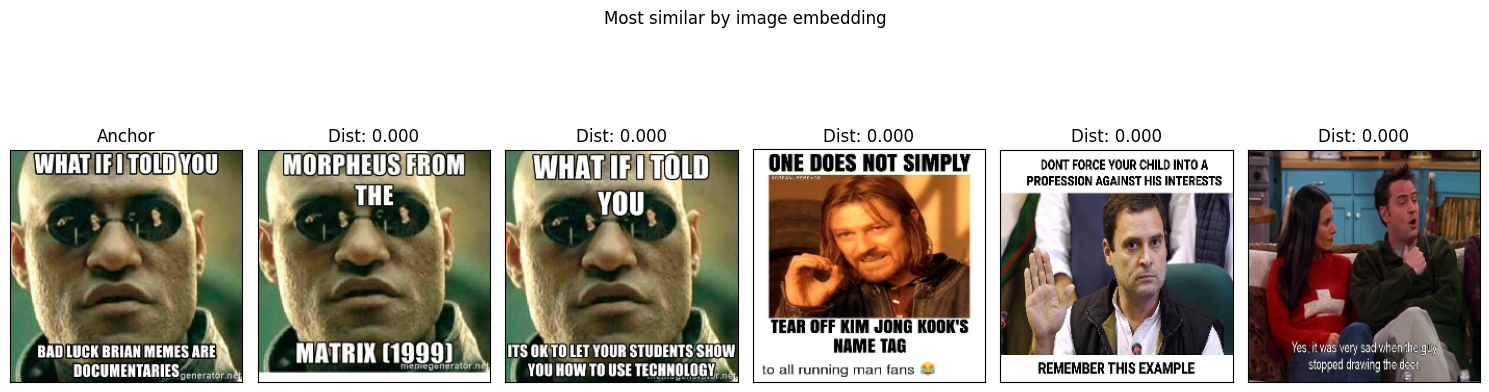

In [7]:
_ = visualize_most_similar(
    title="Most similar by image embedding",
    anchor_index=339,
    z=unimodal_img_emb,
    df=datamodule.df["all"],
)

## Cechy tekstowe
Analogicznie wyuczymy model unimodalnego autokodera, który wykorzystuje tylko cechy pozyskane z napisów umieszczonych na memie.

In [5]:
train_model(
    model_cls=UnimodalAE,
    hparams={
        "name": "TextAE",
        "data_dim": 384,
        "modality_name": "text_emb",
        **default_hparams,
    },
    datamodule=datamodule,
)

Global seed set to 42
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: ./data/logs\TextAE

  | Name    | Type       | Params
---------------------------------------
0 | encoder | Sequential | 263 K 
1 | decoder | Sequential | 263 K 
---------------------------------------
526 K     Trainable params
0         Non-trainable params
526 K     Total params
2.105     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=30` reached.


In [9]:
unimodal_text_emb = extract_embeddings(
    model_cls=UnimodalAE,
    name="TextAE",
    datamodule=datamodule,
)

In [10]:
make_interactive_scatter_plot(
    title="Unimodal text embeddings",
    z_2d=PCA(n_components=2).fit_transform(unimodal_text_emb),
    df=datamodule.df["all"],
)

Dash is running on http://127.0.0.1:8050/



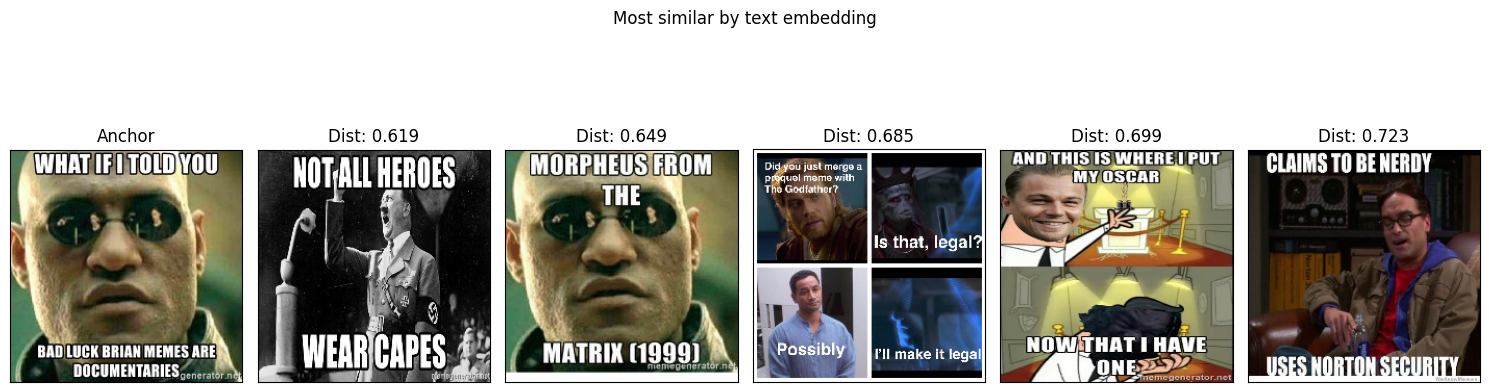

In [11]:
_ = visualize_most_similar(
    title="Most similar by text embedding",
    anchor_index=339,
    z=unimodal_text_emb,
    df=datamodule.df["all"],
)

## Ewaluacja wektorów reprezentacji
Dotychczas ocena jakości reprezentacji była wykonywana oceniając grupowanie się przykładów w 2-wymiarowym rzucie przestrzeni reprezentacji oraz przeglądając podobne instancje. Wykorzystywany zbiór danych posiada również 5 niezależnych etykiet (`humour`, `motivational`, `offensive`, `sarcasm`, `sentiment`). Sprawdźmy zatem jak reprezentacje sprawdzają się w tych 5 zadaniach klasyfikacji.

In [12]:
evaluate_classification(
    model_names=[(UnimodalAE, "ImageAE"), (UnimodalAE, "TextAE")],
    datamodule=datamodule,
)

train_AUC                                                 test_AUC   
task        humour motivational  offensive    sarcasm  sentiment     humour   
model                                                                         
ImageAE  56.41 [%]    55.66 [%]  53.66 [%]  56.28 [%]  55.46 [%]  50.39 [%]  \
TextAE   59.74 [%]    57.38 [%]  62.70 [%]  62.36 [%]  62.15 [%]  50.07 [%]   

                                                       
task    motivational  offensive    sarcasm  sentiment  
model                                                  
ImageAE    50.93 [%]  50.41 [%]  49.09 [%]  48.00 [%]  
TextAE     43.54 [%]  53.12 [%]  53.56 [%]  47.14 [%]